<a href="https://colab.research.google.com/github/s-ryuri/TIL/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Colab
#jupyter면 할 필요 없습니다.

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
plt.style.use('seaborn')

plt.rc('font', family='NanumBarunGothic') 
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20KR"
change_matplotlib_font(font_download_url)

Mounted at /content/drive
/content/drive/MyDrive/Colab
font family:  ['Noto Sans KR']


In [9]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

# 1. 1차원 차원 플롯

1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 <br>
카테고리 값이면 카운트 플롯으로 나타낸다.

실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 matplotlib의 단순한 histogram과 달리 커널 밀도(kernel density) 및 rug 표시 기능 및 다차원 복합 분포 기능을 제공합니다. 1차원 실수 분포 플롯 명령에는 rugplot, kdeplot, distplot 있다.

### rugplot

rug 플롯은 데이터 위치를 x축 위에 작은 선분으로 나타내어 실제 데이터들의 위치를 보여줍니다.

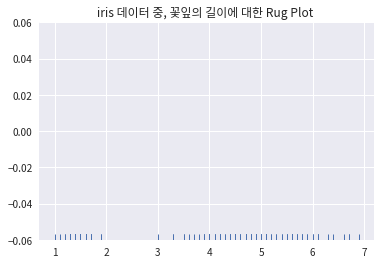

In [11]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

### 커널 밀도 kdeplot

커널 밀도는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

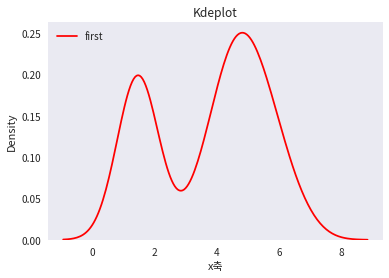

In [18]:
sns.kdeplot(x,color = 'r',label = "first")
plt.title("Kdeplot")
plt.xlabel("x축")
plt.grid(False)
plt.legend(loc = 2)
plt.show()

### distplot

러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용됩니다.

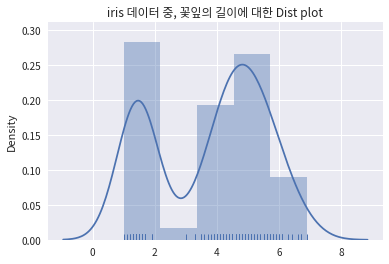

In [19]:
sns.distplot(x,kde = True,rug = True)
plt.title("iris 데이터 중, 꽃잎의 길이에 대한 Dist plot")
plt.show()

# 2. 카운트 플롯

countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시 할 수 있습니다.

countplot 명령은 데이터프레임에만 사용할 수 있습니다.

기본적인 형식은 countplot(x = "column_name",data = dataframe)

data에는 데이터프레임을 x 인수에는 데이터 프레임의 열 이름 문자열을 넣는다.

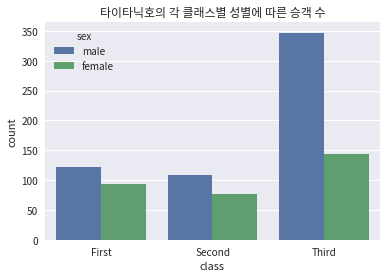

In [21]:
sns.countplot(x = "class",hue = "sex",data = titanic)
plt.title("타이타닉호의 각 클래스별 성별에 따른 승객 수")
plt.show()

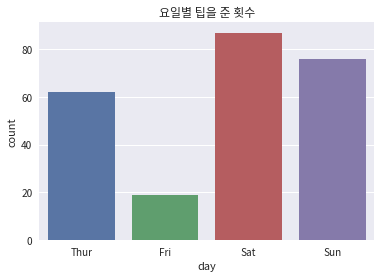

In [23]:
sns.countplot("day",data = tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

# 3. 다차원 데이터

데이터 변수가 여러 개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있다.

1. 분석하고자 하는 데이터가 모두 실수 값인 경우
2. 분석하고자 하는 데이터가 모두 카테고리 값인 경우
3. 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

### 2차원 실수형 데이터

데이터가 2차원이고 모두 연속적인 실수값이라면 scatter plot을 사용하면 된다. scatter plot을 그리기 위해서는 jointplot 명령을 사용하면된다.

jointplot 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램을 그린다.

jointplot(x = "x_name",y = "y_name", data = dataframe, kind = "scatter")



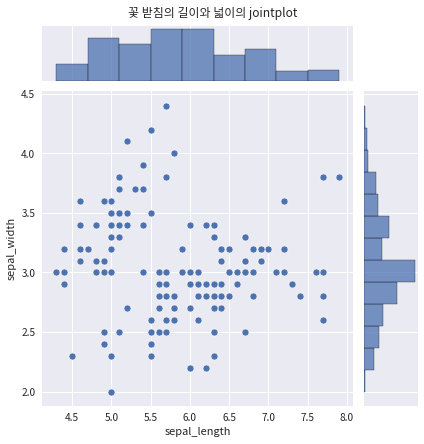

In [28]:
sns.jointplot(x = "sepal_length",y = "sepal_width",data = iris)
plt.suptitle("꽃 받침의 길이와 넓이의 jointplot",y = 1.02)
# y = 1.02 histogram으로 부터 얼마나 떨어져있냐
# title 하면 이쁘게 안나옴
plt.show()

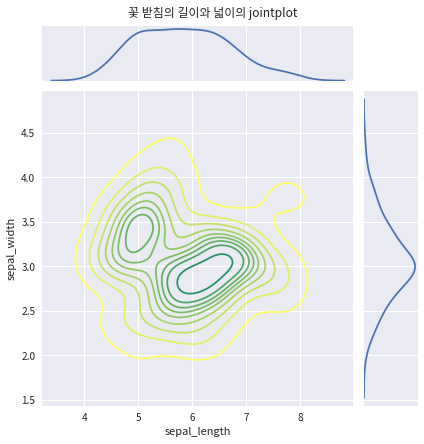

In [30]:
sns.jointplot(x = "sepal_length",y = "sepal_width",data = iris,kind = 'kde',cmap ='summer_r')
plt.suptitle("꽃 받침의 길이와 넓이의 jointplot",y = 1.02)
# y = 1.02 histogram으로 부터 얼마나 떨어져있냐
# title 하면 이쁘게 안나옴
plt.show()

### 다차원 실수형 데이터

3차원 이상의 데이터면 pairplot 명령을 사용합니다.
pairplot은 데이터프레임을 인수로 받아 grid 형태로 각 데이터 열의 조합에 대해 scatter plot을 그립니다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 histogram을 그립니다.

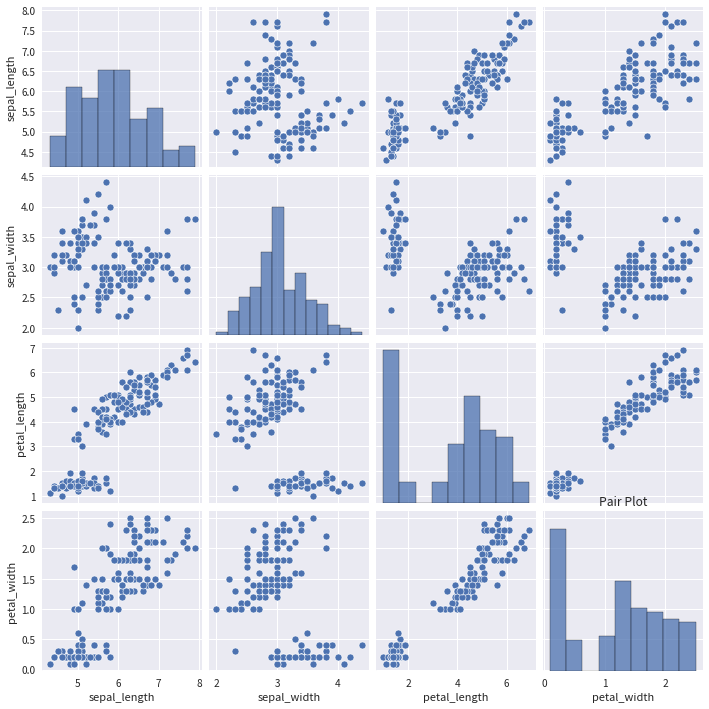

In [31]:
sns.pairplot(iris)
plt.title("Pair Plot")
plt.show()

카테고리형 데이터가 섞여 있으면 hue 인수에 카테고리 변수 이름을 지정해서 카테고리 값에 따라 색상을 다르게 할 수 있습니다.

No handles with labels found to put in legend.


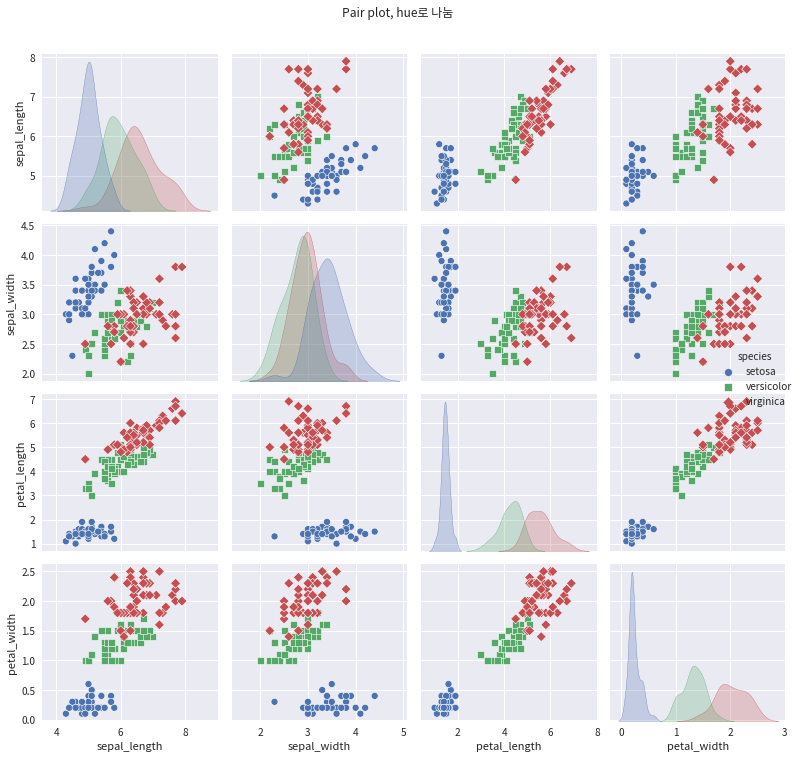

In [43]:
sns.pairplot(iris,hue = "species",markers=["o","s","D"])
plt.suptitle("Pair plot, hue로 나눔",y = 1.05)
plt.tight_layout()
plt.legend(loc = 9)
plt.show()

### 2차원 카테고리 데이터

데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용한다.

In [44]:
titanic_size = titanic.pivot_table(
    index ="class",columns = "sex",aggfunc = "size"
)
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


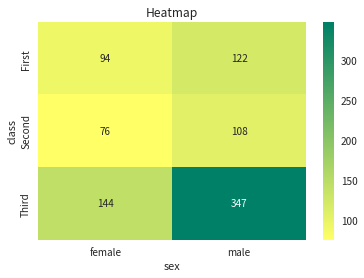

In [48]:
sns.heatmap(titanic_size,cmap = "summer_r",annot = True,fmt = 'd')
plt.title("Heatmap")
plt.show()

### 2차원 복합 데이터

데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.

### barplot

barplot은 카테로기 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 bar chart를 생성한다.
평균은 막대의 높이로 편차는 에러바로 표시한다.

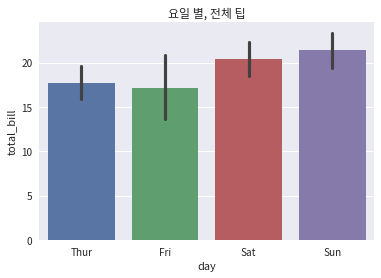

In [49]:
sns.barplot(x = 'day',y = 'total_bill',data = tips)
plt.title("요일 별, 전체 팁")
plt.show()

### boxplot

boxplot 명령은 박스 플롯을 그려준다. 박스 플롯은 박스와 박스 바깥의 선으로 이루어진다.

박스는 실수 값 분포에서 1사분위수(Q1)과 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분위수의 차이를 IQR(interquartile range)라한다. 박스 내부의 가로선은 중앙값을 나타낸다. 박스 외부의 세로선은 1사분위 수보다 1.5 * IQR 만큼 낮은 값과 3사분위 수보다 1.5 * IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 그 바깥은 점은 outlier로 일일히 점으로 표시한다.<br>


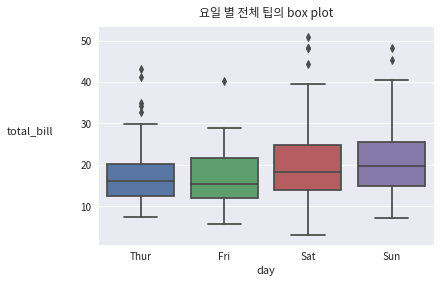

In [67]:
sns.boxplot(x = 'day',y = "total_bill",data = tips)
plt.title("요일 별 전체 팁의 box plot",y = 1.02)
plt.ylabel('total_bill',labelpad=50,rotation = 0)
plt.show()

### violinplot

vilolinplot은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭인 모양을 이룬다.

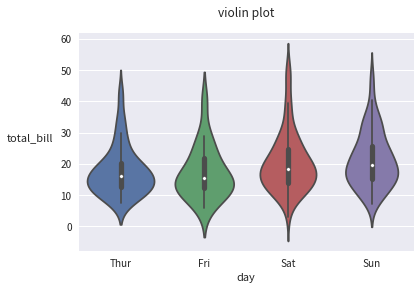

In [70]:
sns.violinplot(x = "day",y = "total_bill",data = tips)
plt.title("violin plot",y = 1.05)
plt.ylabel("total_bill",labelpad=30,rotation = 0)
plt.show()

### stipplot
스캐터 플롯처럼 모든 데이터를 점으로 그려준다.
jitter = True를 설정하면 가로축상의 위치를 무작위로 바꿔서 데이터의 수가 많을 경우에 겹치지 않도록 한다.

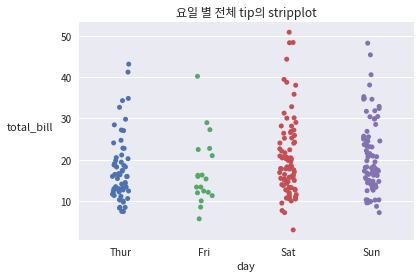

In [71]:
np.random.seed(0)
sns.stripplot(x = "day",y ='total_bill',data = tips,jitter = True)
plt.title("요일 별 전체 tip의 stripplot")
plt.ylabel("total_bill",labelpad=30,rotation = 0)
plt.show()

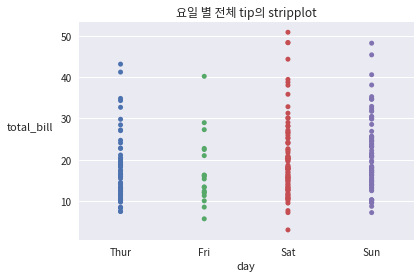

In [72]:
np.random.seed(0)
sns.stripplot(x = "day",y ='total_bill',data = tips,jitter = False)
plt.title("요일 별 전체 tip의 stripplot")
plt.ylabel("total_bill",labelpad=30,rotation = 0)
plt.show()

### swarmplot
stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동합니다.

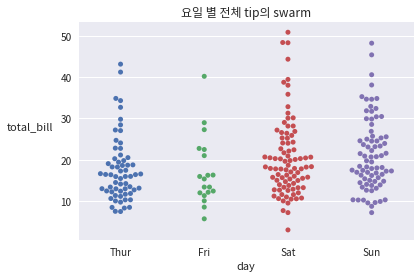

In [73]:
sns.swarmplot(x = "day",y = "total_bill",data = tips)
plt.title("요일 별 전체 팁의 swarm plot")
plt.title("요일 별 전체 tip의 swarm")
plt.ylabel("total_bill",labelpad=30,rotation = 0)
plt.show()

# 4. 다차원 복합 데이터

위에서 언급한 그래프들은 2차원 이상의 고차원 데이터에 대해서도 분석할 수 있다.

barplot, violinplot, boxplot등 에서는 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 hue 인수를 제공한다. hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화 된다. hue 값이 시각화되는 방법은 plot의 종류에 따라 다르다.

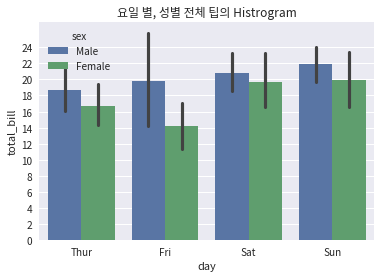

In [79]:
sns.barplot(x = "day",y = "total_bill",hue = "sex",data = tips)
plt.title("요일 별, 성별 전체 팁의 Histrogram")
plt.yticks(np.arange(0,25,2))
plt.show()

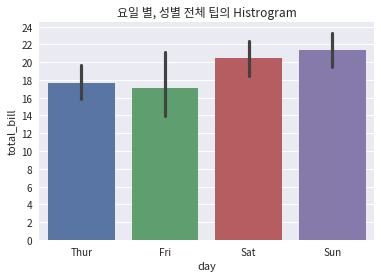

In [80]:
sns.barplot(x = "day",y = "total_bill",data = tips)
plt.title("요일 별, 성별 전체 팁의 Histrogram")
plt.yticks(np.arange(0,25,2))
plt.show()

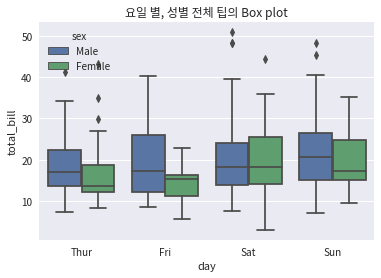

In [81]:
sns.boxplot(x = "day",y = "total_bill",hue = "sex",data = tips)
plt.title("요일 별, 성별 전체 팁의 Box plot")
plt.show()

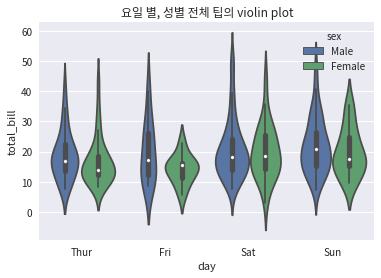

In [83]:
sns.violinplot(x = "day",y = "total_bill",hue = "sex",data = tips)
plt.title("요일 별, 성별 전체 팁의 violin plot")
plt.show()

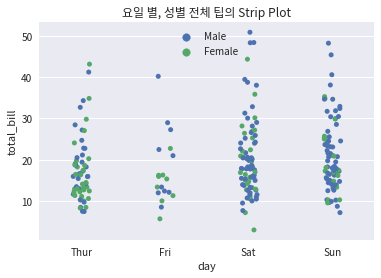

In [84]:
np.random.seed(0)
sns.stripplot(x = "day",y = "total_bill",hue = "sex",data = tips,jitter=True)
plt.title('요일 별, 성별 전체 팁의 Strip Plot')
plt.legend(loc = 9)
plt.show()

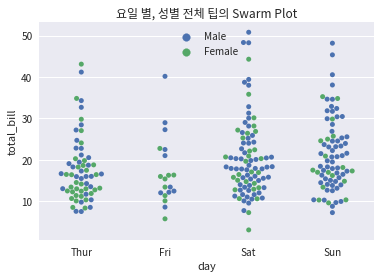

In [86]:
np.random.seed(0)
sns.swarmplot(x = "day",y = "total_bill",hue = "sex",data = tips)
plt.title('요일 별, 성별 전체 팁의 Swarm Plot')
plt.legend(loc = 9)
plt.show()

stripplot,violinplot, swarmplot 에서는 split 또는 dodge 옵션으로 시각화 방법을 변경할 수 있다.

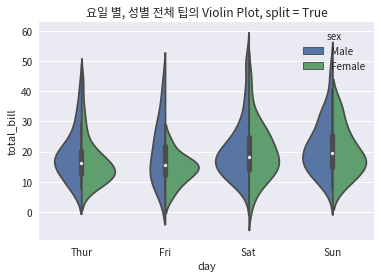

In [87]:
sns.violinplot(x = "day",y = "total_bill",hue = "sex",data = tips,split = True)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, split = True")
plt.show()

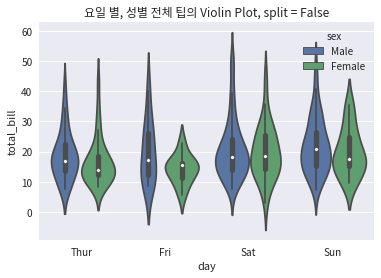

In [100]:
sns.violinplot(x = "day",y = "total_bill",hue = "sex",data = tips,split = False)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, split = False")
plt.show()

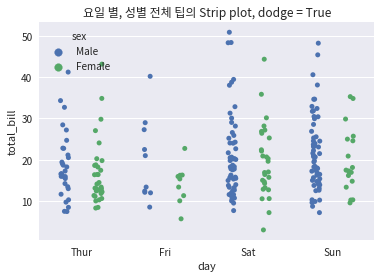

In [93]:
sns.stripplot(x = "day",y = "total_bill",hue = 'sex',data = tips,jitter = True,dodge = True)
plt.title("요일 별, 성별 전체 팁의 Strip plot, dodge = True")
plt.show()

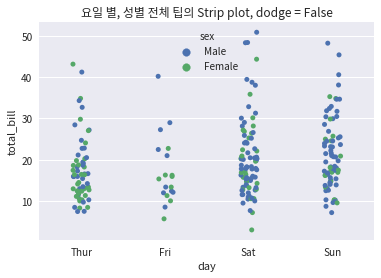

In [94]:
sns.stripplot(x = "day",y = "total_bill",hue = 'sex',data = tips,jitter = True,dodge = False)
plt.title("요일 별, 성별 전체 팁의 Strip plot, dodge = False")
plt.show()

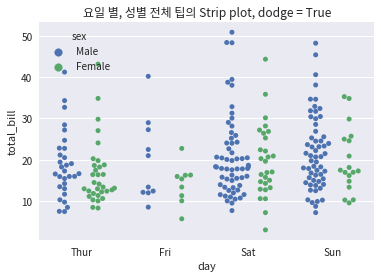

In [95]:
sns.swarmplot(x = "day",y = "total_bill",hue = 'sex',data = tips,dodge = True)
plt.title("요일 별, 성별 전체 팁의 Strip plot, dodge = True")
plt.show()

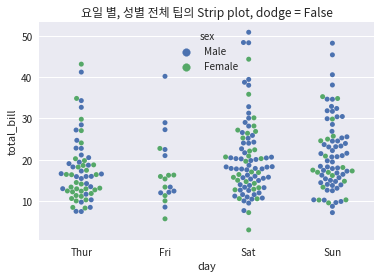

In [96]:
sns.swarmplot(x = "day",y = "total_bill",hue = 'sex',data = tips,dodge = False)
plt.title("요일 별, 성별 전체 팁의 Strip plot, dodge = False")
plt.show()

heatmap을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.

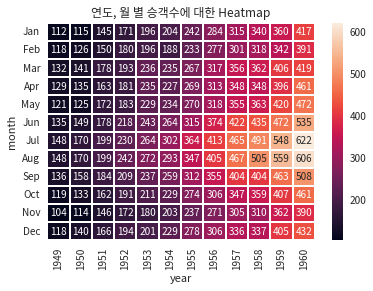

In [97]:
flights_passengers = flights.pivot("month","year","passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers,annot = True,fmt = "d",linewidths = 1)
plt.show()

# 5. Catplot

catplot은 색상(hue)과 행(row)등을 동시에 사용해서 3개 이상의 카테고리 값에 의한 분포 변화를 보여줍니다.

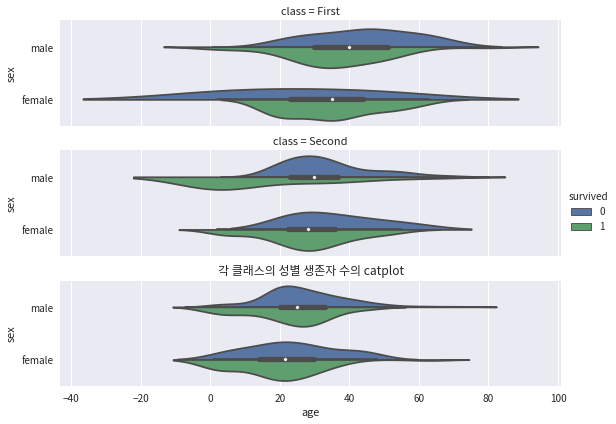

In [98]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x = "age",y = "sex",hue = "survived",row = 'class',data = data,
            kind = 'violin',split = True,height = 2,aspect = 4)
plt.title("각 클래스의 성별 생존자 수의 catplot")
plt.show()

# 6. 기타

시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있다.


<function matplotlib.pyplot.show>

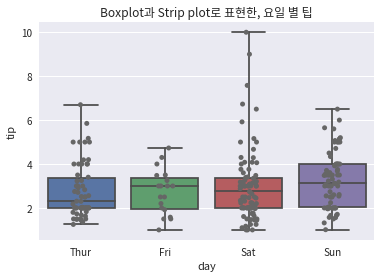

In [102]:
plt.title("Boxplot과 Strip plot로 표현한, 요일 별 팁")
sns.boxplot(y = "tip",x = "day",data = tips,whis = np.inf)
sns.stripplot(y = "tip",x = "day",data = tips,jitter = True,color = "0.4")
plt.show

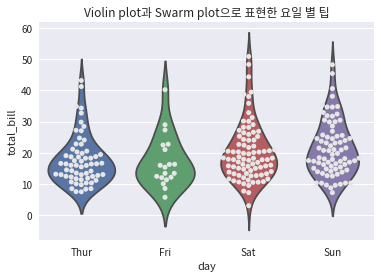

In [105]:
plt.title("Violin plot과 Swarm plot으로 표현한 요일 별 팁")
sns.violinplot(x = "day",y = "total_bill",data = tips,inner = None)
sns.swarmplot(x = "day",y = "total_bill",data = tips,color = "0.9")
plt.show()

# 7. 스타일 

seaborn을 임포트하면 색상 들을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seabonr에서 지정한 기본 스타일로 바꿉니다. 따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 plot은 모양이 다릅니다.

set 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 seaborn 기본 스타일로 바꿀 수 있습니다. 
set_style 명령은 tick 스타일만 바꿀 수 있습니다.

darkgrid, whitegrid,dark, white 그리고 ticks 스타일을 제공합니다.

In [106]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

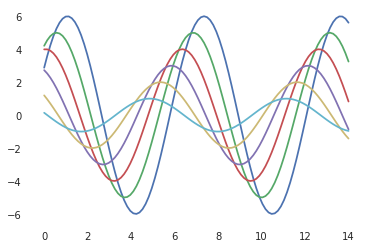

In [107]:
sns.set_style("ticks")
sinplot()

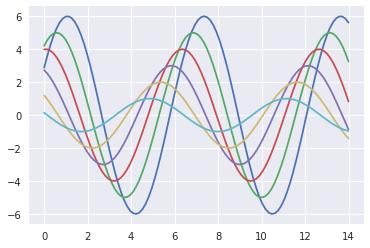

In [108]:
sns.set_style("darkgrid")
sinplot()

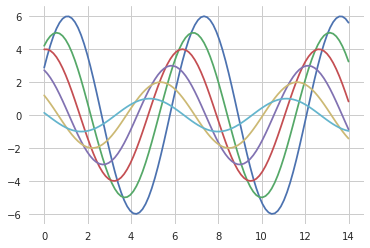

In [109]:
sns.set_style("whitegrid")
sinplot()